## PANDAS

In [324]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from subprocess import check_output
import seaborn as sns
import sys

In [611]:
# We load the CSV file
sharks= pd.read_csv("C:/Users/AaronElias/Desktop/ironHack/attacks.csv", encoding = "ISO-8859-1")


# I renamed the column Case_Number
sharks.rename(columns={"Case Number":"Case_Number"}, inplace=True)
sharks.rename(columns={"Sex ":"Sex"}, inplace=True)

#we drop all the columns that I will not use for my project
sharks.drop(columns=['Unnamed: 22','Unnamed: 23',"href","href formula","pdf","original order","Time","Investigator or Source","Case Number.1","Case Number.2","Type","Age","Fatal (Y/N)","Name","Species "], inplace=True)
sharks.drop(columns=["Case_Number"], inplace= True)



In [612]:
# This shows the shape of or data frame
print(sharks.shape)
#This will show the columns of the data frame
print(sharks.columns)

(25723, 8)
Index(['Date', 'Year', 'Country', 'Area', 'Location', 'Activity', 'Sex',
       'Injury'],
      dtype='object')


## I will replace all the NaN values for no info

In [613]:
sharks['Country'] = sharks['Country'].fillna('No info')
sharks['Activity'] = sharks['Activity'].fillna('No info')
sharks['Injury'] = sharks['Injury'].fillna('No info')
sharks['Area'] = sharks['Area'].fillna('No info')
sharks['Location'] = sharks['Location'].fillna('No info')
sharks['Year'] = sharks['Year'].fillna('No info')
sharks['Sex'] = sharks['Sex'].fillna('No info')
sharks['Date'] = sharks['Date'].fillna('No date')

#I will change the Injury tex to lower case
sharks["Injury"]=sharks["Injury"].str.lower()


## Cleanning the column Date

In [614]:
#I Took out all the data that contains more info that i specified with the regular expression
sharks['Date']=sharks['Date'].str.extract(r"(\d{2}-[A-z]{3}-\d{4})")

#I go some null values and I eliminated them with a dropna
sharks.dropna(inplace=True)

## I cleaned the Year column

In [615]:
#I eliminated the 0 values from this colum
sharks.drop(sharks[sharks.Year == 0.0].index, inplace=True)


## Cleanning the column Area

In [616]:
sharks.drop(sharks[sharks.Area == "No info"].index, inplace=True)
sharks["Area"]=sharks["Area"].replace("¿","").replace("?","").replace(",","")


## Column Location

In [617]:
sharks.drop(sharks[sharks.Location == "No info"].index, inplace=True)


## Activity Column

In [618]:
sharks.drop(sharks[sharks.Activity == "No info"].index, inplace=True)


## Sex Column

In [619]:
sharks.drop(sharks[sharks.Sex == "No info"].index, inplace=True)
sharks.drop(sharks[sharks.Sex == "N"].index, inplace=True)
sharks.drop(sharks[sharks.Sex == "lli"].index, inplace=True)
sharks.drop(sharks[sharks.Sex == "."].index, inplace=True)
sharks["Sex"]=sharks["Sex"].str.strip()
sharks['Sex'].value_counts()



M    3738
F     511
Name: Sex, dtype: int64

## Country Column

In [627]:
sharks.drop(sharks[sharks.Country == "No info"].index, inplace=True)

sharks["Country"]= sharks.Country.str.replace('\&', 'and').str.strip()
sharks["Country"]= sharks.Country.replace('\/.+|\(.+\)|\.|\?', '')
sharks["Country"].replace("ST HELENA, British overseas territory","UNITED KINGDOM",inplace=True)
sharks["Country"].replace("ENGLAND","UNITED KINGDOM",inplace=True)
sharks["Country"].replace("BRITISH ISLES","UNITED KINGDOM",inplace=True)
sharks["Country"].replace("OKINAWA","JAPAN",inplace=True)
sharks["Country"].replace("AZORES","PORTUGAL",inplace=True)
sharks["Country"].replace("RED SEA","EGYPT",inplace=True)
sharks["Country"].replace("NEW BRITAIN","PAPUA NEW GUINEA",inplace=True)
sharks["Country"].replace("NEW GUINEA","PAPUA NEW GUINEA",inplace=True)
sharks["Country"].replace("BRITISH NEW GUINEA","PAPUA NEW GUINEA",inplace=True)
sharks["Country"].replace("ADMIRALTY ISLANDS","PAPUA NEW GUINEA",inplace=True)
sharks["Country"].replace("FEDERATED STATES OF MICRONESIA","MICRONESIA",inplace=True)
sharks["Country"].replace("COLUMBIA","COLOMBIA",inplace=True)
sharks["Country"]=sharks["Country"].str.title()
sharks["Country"].unique()
sharks["Country"].value_counts().head(10)

Usa                 1824
Australia           1011
South Africa         448
New Zealand           92
Brazil                84
Papua New Guinea      62
Bahamas               56
Mexico                50
Reunion               34
Italy                 33
Name: Country, dtype: int64

## Injury column

In [628]:
sharks["Injury"]= sharks.Injury.str.replace('\&', 'and')


In [624]:
sharks

,Date,Year,Country,Area,Location,Activity,Sex,Injury
0,25-Jun-2018,2018,Usa,California,"Oceanside, San Diego County",Paddling,F,"no injury to occupant, outrigger canoe and pad..."
1,18-Jun-2018,2018,Usa,Georgia,"St. Simon Island, Glynn County",Standing,F,minor injury to left thigh
2,09-Jun-2018,2018,Usa,Hawaii,"Habush, Oahu",Surfing,M,injury to left lower leg from surfboard skeg
3,08-Jun-2018,2018,Australia,New South Wales,Arrawarra Headland,Surfing,M,minor injury to lower leg
4,04-Jun-2018,2018,Mexico,Colima,La Ticla,Free diving,M,lacerations to leg and hand shark provoked inc...
...,...,...,...,...,...,...,...,...
6114,11-May-1817,1817,Sri Lanka,Western Province,Colombo,Swimming,M,fatal
6120,15-Sep-1810,1810,Usa,South Carolina,Charleston,Fell into the water,M,fatal
6142,08-Aug-1780,1780,Usa,Florida,"Pensacola Harbor, Escambia County",Swimming,M,fatal
6156,06-Apr-1738,1738,Italy,Sicily,Strait of Messina,Swimming,M,fatal


##  Plots

In [629]:
print(sharks['Country'].value_counts().head())

Countrys= sharks['Countrys'].value_counts().head()
Countrys.plot(title="The five country with more attacks in the world")

Usa             1824
Australia       1011
South Africa     448
New Zealand       92
Brazil            84
Name: Country, dtype: int64


KeyError: 'Countrys'

In [625]:
print(sharks['Years'].value_counts().sort_index())
sharks["Years"]=sharks[sharks["Year"]>2000]["Year"]
Years= sharks['Years'].value_counts().sort_index()
Years.plot(title="Shark Attacks in the last 20 years",kind="barh")

KeyError: 'Years'

M    3735
F     511
Name: Sex, dtype: int64


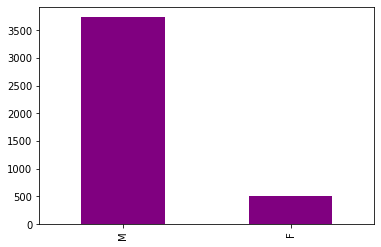

In [610]:
print(sharks['Sex'].value_counts())

sharks[sharks['Sex'].isin(['M','F'])]["Sex"].value_counts().plot.bar(color='purple')
